# Inaugural Project

**Team:** M&M

**Members:** Markus Gorgone Larsen () & Matias Bjørn Frydensberg Hall (pkt593)

**Imports and set magics:**

In [1]:
import numpy as np
import copy
from types import SimpleNamespace
from scipy import optimize
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Question 1

We consider a household solving the following maximisation problem when looking to buy a home:


$$
\begin{aligned}
c^*, h^* & =  \text{arg}\max_{c,h}c^{1-\phi}h^\phi\\
& \text{s.t.}\\
\tilde{p}_h & = p_h\epsilon\\
m & = \tau(p_h, \tilde{p}_h) + c\\
\tau(p_h, \tilde{p}_h) & = rp_h +\tau^g\tilde{p}_h + \tau^p max\{\tilde{p}_h - \bar{p}, 0\}
\end{aligned}
$$

Where $c$ is consumption, $h$ is housing quality, $p_h$ is the price of housing, $\epsilon$ is the public housing assement factor, $\phi$ is the Cobb-Douglas weights, $m$ is cash-on-hand, $r$ is the mortgage interest rate, $\tau^g$ is the base housing tax, $\tau^p$ is the progressive housing tax and $\bar{p}$ is the cutoff price for the progressive tax.

As utility is monotonically increasing in consumption we can define consumption as:
$$
c = m - \tau(p_h, \tilde{p}_h)
$$

Plugging c into the utility function we get the following:
$$
c^*, h^* & = \text{arg}\max_{h}(m - rp_h +\tau^g\tilde{p}_h + \tau^p max\{\tilde{p}_h - \bar{p}, 0\})^{1-\phi}h^\phi
$$

The utility function and optimisation function is defined in the module and used to solve the households problem

In [4]:
# a. Create simplenamespace and set parameter values
par = SimpleNamespace()

par.phi = 0.3
par.epsilon = 0.5
par.r = 0.03
par.tau_g = 0.012
par.tau_p = 0.004
par.p_bar = 3
par.m = 0.5
par.seed = 1

# b. Compute optimal housing quality, consumption and utility
h_star, c_star, u_star = inauguralproject.u_optimize(par)

# c. Print solution
print(f'The household will choose optimal housing = {h_star:.2f}, which implies optimal consumption = {c_star:.2f} and utility = {u_star:.2f}')

The household will choose optimal housing = 4.17, which implies optimal consumption = 0.35 and utility = 0.74


# Question 2

First we create an array of equally spaced values of m using linespace for values between 0.4 and 1.5. We also create empty arrays as contains for h, c and u values. We then find the optimal values by looping over the values of m. Finally we plot the two graphs. We observe that when m is in the range of 0.72 to about 0.75 optimal housing is unchanged at 6, while consumption increase more rapidly in this range. This is due to the cutoff price. In this range it is more benificial for the household to spend little more than 70% on consumption due to the fact that higher housing quality would increase taxes which in the interval offsets the higher utility from higher housing quality.

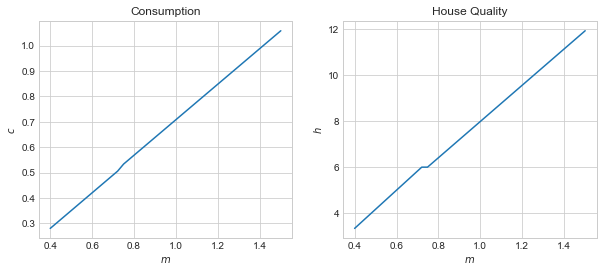

In [8]:
# a. Create array of m's and container for h*, c* and u*
N = 1000
m_vec = np.linspace(0.4, 1.5, N)
h_vec = np.zeros(N)
c_vec = np.zeros(N)
u_vec = np.zeros(N)

# b. Loop the optimise function over the m_vec array
for i in range(N):
    par.m = m_vec[i]
    h_vec[i], c_vec[i], u_vec[i] = inauguralproject.u_optimize(par)

# c. Create graph and plot
inauguralproject.two_figures(m_vec, c_vec, "Consumption", "$m$", "$c$", m_vec, h_vec, "House Quality", "$m$", "$h$")

# Question 3

ADD ANSWER.

In [4]:
# a. Adding population size, mean and standard deviation to namespace of parameters
par.pop = 10000
par.mu = -0.4
par.sigma = 0.35

# b. Compute the total tax burden
T = tax_total(par)

print(f'The total tax revenue is {T:.2f}')

## Bonus

# Question 4

ADD ANSWER.

In [5]:
# code

# Question 5

ADD ANSWER.

In [6]:
# code

# Conclusion

ADD CONCISE CONLUSION.